
# Import Libraries


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standard plotly imports
import plotly.plotly as py
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks as cf
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# Import Dataset

In [34]:
df=pd.read_csv("C:/DataScienceProjects/20190703 Client subscriptions/3. Uploaded Data/subsappdata.csv")

In [35]:
df.head(5)

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


# Pre-Processing

In [36]:
response = df['enrolled']
df = df.drop (columns=['enrolled'])

In [37]:
# Split dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (df, response,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [38]:
# Remove the user identifier column (which has no prediction power) and save it for later use
train_identifier = X_train['user']
X_train=X_train.drop(columns=['user'])
test_identifier = X_test['user']
X_test = X_test.drop(columns=['user'])

In [39]:
# Normalizing dataset while keeping features columns name and index
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train2 = pd.DataFrame(sc.fit_transform(X_train))
X_test2 = pd.DataFrame(sc.transform(X_test))

#Copying columns name
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

#Copying index
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.

C:\Users\astei\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by StandardScaler.



,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMcount,CCCount,LoansCount
20330,-0.504961,1.000837,0.025525,-1.026726,-0.346830,2.186018,2.246319,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,1.785389
17532,-0.997389,1.135280,-0.898034,1.328829,2.883254,-0.457453,-0.445173,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.839740,-0.260877,0.057524,-0.289185,0.309800
45819,-1.489818,-1.150250,-0.528611,4.066366,2.883254,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,0.878421,1.336593,1.785389
34807,0.479896,0.059736,-0.620967,0.182883,2.883254,-0.457453,-0.445173,0.962262,-0.644848,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
31888,-0.012532,0.463065,1.687932,-0.644744,-0.346830,-0.457453,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.875753,-0.260877,0.878421,-0.289185,-1.165789
48372,1.464753,1.135280,0.302593,0.055556,-0.346830,-0.457453,2.246319,-1.039218,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,0.481993,1.857638,0.057524,-0.289185,1.785389
5524,-0.504961,0.866394,-0.898034,-0.326426,2.883254,2.186018,-0.445173,-1.039218,-0.644848,-1.052581,...,-0.119697,-0.11742,8.629699,-0.091207,-0.087221,-1.147303,-0.260877,0.057524,2.962372,0.309800
38032,-0.997389,-0.612478,-0.805679,1.328829,-0.346830,2.186018,-0.445173,0.962262,-0.644848,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,1.025092,-0.260877,-0.763372,-0.289185,0.309800
14944,-0.012532,-1.419136,0.302593,-0.517417,-0.346830,-0.457453,-0.445173,-1.039218,1.550753,-1.052581,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-1.147303,-0.260877,-0.763372,-0.289185,0.309800
22793,-0.504961,0.731951,1.318508,0.501202,-0.346830,-0.457453,2.246319,0.962262,1.550753,0.950046,...,-0.119697,-0.11742,-0.115879,-0.091207,-0.087221,-0.332655,-0.260877,2.520213,-0.289185,0.309800


# Model building

In [41]:
from sklearn.linear_model import LogisticRegression

In [66]:
clf = LogisticRegression(random_state=0, penalty = 'l1',solver='liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [67]:
y_pred =clf.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test,y_pred)

In [69]:
accuracy_score(y_test,y_pred)

0.7681

In [70]:
precision_score(y_test,y_pred)

0.7618952017667135

In [71]:
recall_score(y_test,y_pred)

0.7700892857142857

In [72]:
f1_score(y_test,y_pred)

0.7659703300030276

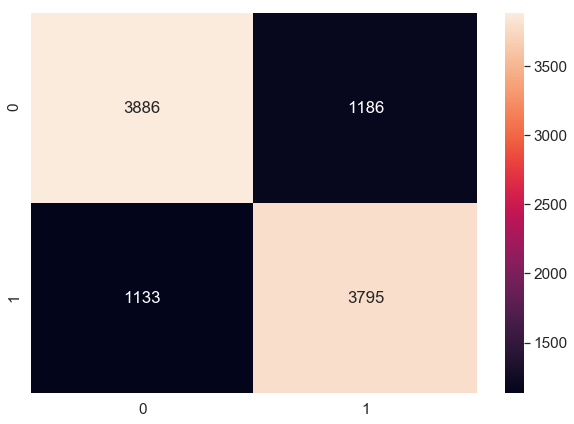

In [73]:
#PLotting confusion matrix
df_cm = pd.DataFrame (cm, index = (0,1), columns = (0,1))
plt.figure(figsize = (10,7))
sns.set(font_scale = 1.4)
sns.heatmap (df_cm, annot = True, fmt = 'g')

In [75]:
#Performing a cross_validation test to make sure the model is not overfitting. Although, we have a strong idea this is not the case based on previous metrics
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score (estimator = clf, X = X_train, y = y_train, cv = 10)
print ("logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

logistic Accuracy: 0.767 (+/- 0.010)
